In [1]:
# Импорт базовых библиотек
import numpy as np
import pandas as pd

# Визуализация

import seaborn as sns
import matplotlib.pyplot as plt

# Utils
from sklearn.model_selection import cross_val_score

# Модели (классификация)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Метрики
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # для классификации

In [2]:
df = pd.read_csv('data/SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
df = pd.DataFrame(df[::100], columns = df.columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 232700
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             2328 non-null   object 
 1   artist_name       2328 non-null   object 
 2   track_name        2328 non-null   object 
 3   track_id          2328 non-null   object 
 4   popularity        2328 non-null   int64  
 5   acousticness      2328 non-null   float64
 6   danceability      2328 non-null   float64
 7   duration_ms       2328 non-null   int64  
 8   energy            2328 non-null   float64
 9   instrumentalness  2328 non-null   float64
 10  key               2328 non-null   object 
 11  liveness          2328 non-null   float64
 12  loudness          2328 non-null   float64
 13  mode              2328 non-null   object 
 14  speechiness       2328 non-null   float64
 15  tempo             2328 non-null   float64
 16  time_signature    2328 non-null   object

In [4]:
df["popular_lvl"] = df["popularity"].transform(lambda x: 0 if x < 50 else (1 if x < 75 else 2))

In [5]:
dfx = pd.DataFrame(df, columns=['tempo', 'danceability', 'energy', 'loudness', 'valence'])
X = dfx.to_numpy()
y = df["popular_lvl"].to_numpy()

(array([0, 1, 2], dtype=int64), array([1503,  787,   38], dtype=int64))


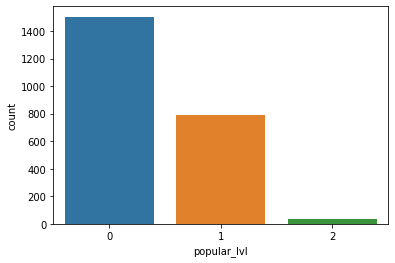

In [6]:
print(np.unique(df['popular_lvl'], return_counts=True))
sns.countplot(x='popular_lvl', data=df);

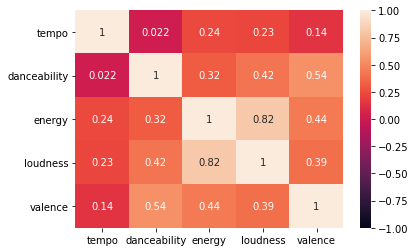

In [7]:
sns.heatmap(dfx.corr(), vmin=-1, vmax=1, annot=True);

tempo: NormaltestResult(statistic=93.88728319975576, pvalue=4.098599594293369e-21)
danceability: NormaltestResult(statistic=61.93973779030643, pvalue=3.547781245281514e-14)
energy: NormaltestResult(statistic=278.65260413500783, pvalue=3.0999581305722367e-61)
loudness: NormaltestResult(statistic=745.7541355219767, pvalue=1.1522508658339404e-162)
valence: NormaltestResult(statistic=465.9170349436986, pvalue=6.720496350865629e-102)


<AxesSubplot:xlabel='danceability', ylabel='count'>

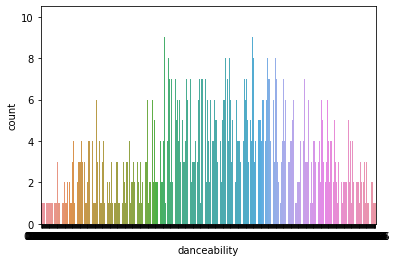

In [8]:
from scipy import stats

for col in dfx.columns:
    print(col + ": " + str(stats.normaltest(dfx[col])))
sns.countplot(x="danceability" , data=df)

In [9]:
scoring = make_scorer(precision_score, average='micro')

knn_clf = KNeighborsClassifier()
svm_clf = SVC()
forest_clf = RandomForestClassifier()

knn_acc_score = cross_val_score(knn_clf, X, y, cv=7).mean()
svm_acc_score = cross_val_score(svm_clf, X, y, cv=7).mean()
forest_acc_score = cross_val_score(forest_clf, X, y, cv=7).mean()

leaderboard = sorted([
    ('KNN', knn_acc_score),
    ('SVC', svm_acc_score),
    ('Forest', forest_acc_score)
], key=lambda pair: pair[1], reverse=True)

print('Leaderboard:')
for idx, (leader_name, leader_score) in enumerate(leaderboard):
    print(f'{idx + 1}. {leader_name}: {leader_score}')

Leaderboard:
1. SVC: 0.6456185100763415
2. Forest: 0.6314485742196585
3. KNN: 0.5902180149168101
